In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Basic Utilities
import os
import sys
import math
import random
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")

#  Data Handling

import pandas as pd
import numpy as np

#  Visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

#  Statistics & Hypothesis Testing

from scipy import stats
from scipy.special import softmax

#  Feature Selection

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, chi2, RFE

#  Preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#  Classical Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#  Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, TimeSeriesSplit, RepeatedKFold
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
    r2_score, classification_report, confusion_matrix
)

# Time Series Utilities
from pandas.tseries.offsets import DateOffset
import datetime



#  Save & Load

import joblib
import pickle

#Load Dataset

In [46]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MRP/Current/Deliverables/Methodology_&_Experiments/Report/Coding/Data_files/Data_Co.csv', encoding='latin-1')

In [47]:
display(df.head())

,date,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,...,order_month,order_dayofweek,order_weekend,shipping_date,shipping_time,shipping_hour,shipping_week,shipping_month,shipping_dayofweek,shipping_weekend
0,2018-01-31 22:56:00,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,...,1,2,False,2018-02-03,22:56:00,22,5,2,5,True
1,2018-01-13 12:27:00,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,...,1,5,True,2018-01-18,12:27:00,12,3,1,3,False
2,2018-01-13 12:06:00,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,...,1,5,True,2018-01-17,12:06:00,12,3,1,2,False
3,2018-01-13 11:45:00,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,...,1,5,True,2018-01-16,11:45:00,11,3,1,1,False
4,2018-01-13 11:24:00,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,...,1,5,True,2018-01-15,11:24:00,11,3,1,0,False


In [48]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [49]:
df = df.set_index('order_date')

In [50]:
df.columns

Index(['date', 'Type', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Ship

In [51]:
display(df.head())

,date,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,...,order_month,order_dayofweek,order_weekend,shipping_date,shipping_time,shipping_hour,shipping_week,shipping_month,shipping_dayofweek,shipping_weekend
order_date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,2018-01-31 22:56:00,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,...,1,2,False,2018-02-03,22:56:00,22,5,2,5,True
2018-01-13,2018-01-13 12:27:00,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,...,1,5,True,2018-01-18,12:27:00,12,3,1,3,False
2018-01-13,2018-01-13 12:06:00,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,...,1,5,True,2018-01-17,12:06:00,12,3,1,2,False
2018-01-13,2018-01-13 11:45:00,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,...,1,5,True,2018-01-16,11:45:00,11,3,1,1,False
2018-01-13,2018-01-13 11:24:00,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,...,1,5,True,2018-01-15,11:24:00,11,3,1,0,False


In [52]:
# Drop irrelevant/leaky columns
columns_to_drop = [
        'Product Description', 'Product Image', 'Order Zipcode', 'Customer Email', 'Customer Password',
        'Customer Zipcode', 'Customer Lname', 'Customer Fname', 'Days for shipping (real)',
        'Benefit per order', 'Order Item Profit Ratio', 'Order Profit Per Order', 'Sales per customer',
        'Order Item Total', 'shipping date (DateOrders)', 'shipping_hour', 'shipping_week',
        'shipping_month', 'shipping_dayofweek', 'shipping_weekend', 'Category Id',
        'Order Item Cardprod Id', 'Order Customer Id', 'Order Item Id', 'Order Item Product Price',
        'Product Card Id', 'Order Item Discount Rate', 'Product Status', 'Order City', 'Order State',
        'Customer City', 'Customer State', 'Customer Street', 'Late_delivery_risk', 'date'

]

In [53]:
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [54]:
# Encode non-numeric features
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
processed_cols = []

for col in non_numeric_cols:
    if df[col].nunique() < 50000:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str).fillna("missing"))
        processed_cols.append(col)

print("Processed non-numeric columns:", processed_cols)

Processed non-numeric columns: ['Type', 'Delivery Status', 'Category Name', 'Customer Country', 'Customer Segment', 'Department Name', 'Market', 'Order Country', 'Order Region', 'Order Status', 'Product Name', 'Shipping Mode', 'order_time', 'order_weekend', 'shipping_date', 'shipping_time']


In [55]:
# Correlation heatmap
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="RdYlGn", mask=mask)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("heatmap.png")
plt.close()

In [56]:
# Resample 'Sales' to daily frequency
daily_sales = df['Sales'].resample('D').sum()

In [58]:
# Prepare X and y
X = df.loc[:, ~df.columns.isin(["Sales"])]
y = daily_sales

In [59]:
# Scale features
scaler = MinMaxScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

In [60]:
# Resample to daily frequency
daily_scaled_X = scaled_X.resample('D').sum()

In [61]:
 # Feature selection
rfr = RandomForestRegressor(random_state=42)
rfr.fit(daily_scaled_X, y)

RandomForestRegressor(random_state=42)

In [62]:
importances = pd.Series(rfr.feature_importances_, index=daily_scaled_X.columns)
selected_features = importances.sort_values(ascending=False).head(20).index.tolist()

In [63]:
print("Top selected features:", selected_features)

Top selected features: ['Order Item Discount', 'Product Price', 'Department Id', 'Latitude', 'Order Item Quantity', 'Product Name', 'Product Category Id', 'Order Region', 'Order Status', 'Category Name', 'Department Name', 'order_time', 'Longitude', 'Order Id', 'shipping_date', 'order_hour', 'Order Country', 'Customer Id', 'shipping_time', 'order_month']


In [64]:
# Return selected daily data
df_selected = daily_scaled_X[selected_features]
df_selected["Sales"] = y

Mean Squared Error: 222106870.66
Mean Absolute Error: 8831.40
R-squared: 0.29


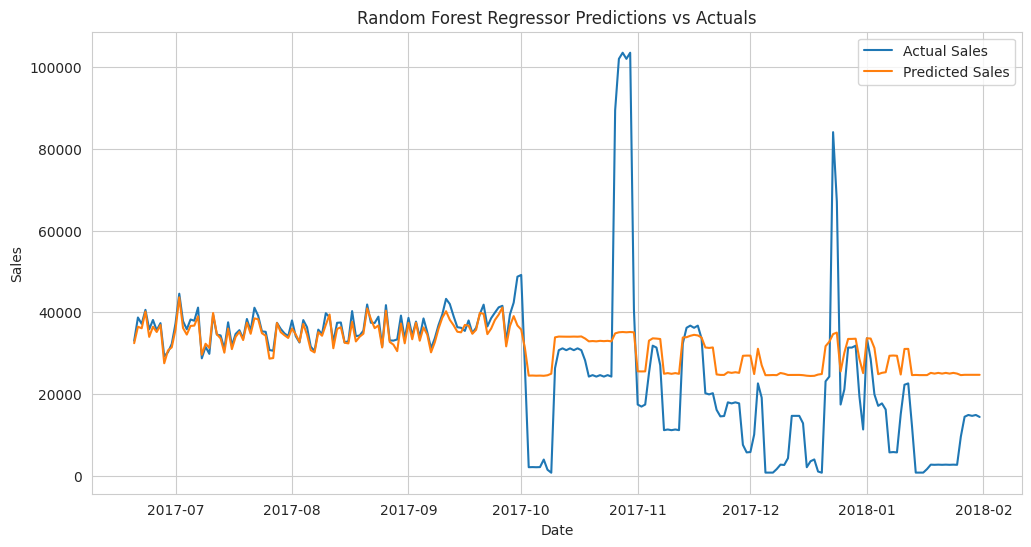

In [65]:
# Separate features (X) and target (y)
X_selected = df_selected.drop("Sales", axis=1)
y_selected = df_selected["Sales"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales')
plt.plot(y_test.index, y_pred, label='Predicted Sales')
plt.title('Random Forest Regressor Predictions vs Actuals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()